# Big Data Course | Spring 2023
## First Homework 
### Problem 02 - Association Rules for Fraud Detection
#### Mohsen Ebadpour | M.Ebadpour@aut.ac.ir | 400131080

---


**Connecting to google drive to get dataset**

In [30]:
from google.colab import drive
drive.mount('/content/drive')
FileName = '/content/drive/MyDrive/creditcard.csv'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Import Libraries**

In [130]:
import pandas as pd
import numpy as np 
import sklearn 
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.preprocessing import StandardScaler
from itertools import combinations
from tqdm import tqdm
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

**Loading data & Normalization**

In [32]:
def NormalizeDataFrame(dataframe,cols):
    result = dataframe.copy()
    for feature_name in cols:
        max_value = dataframe[feature_name].max()
        min_value = dataframe[feature_name].min()
        result[feature_name] = (dataframe[feature_name] - min_value) / (max_value - min_value)
    return result

data = pd.read_csv(FileName)
features = ["V{0}".format(i) for i in range(1,29)]
features.append("Amount")
data = NormalizeDataFrame(data,features)
data.drop("Time",inplace=True,axis=1)
data

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.935192,0.766490,0.881365,0.313023,0.763439,0.267669,0.266815,0.786444,0.475312,0.510600,...,0.561184,0.522992,0.663793,0.391253,0.585122,0.394557,0.418976,0.312697,0.005824,0
1,0.978542,0.770067,0.840298,0.271796,0.766120,0.262192,0.264875,0.786298,0.453981,0.505267,...,0.557840,0.480237,0.666938,0.336440,0.587290,0.446013,0.416345,0.313423,0.000105,0
2,0.935217,0.753118,0.868141,0.268766,0.762329,0.281122,0.270177,0.788042,0.410603,0.513018,...,0.565477,0.546030,0.678939,0.289354,0.559515,0.402727,0.415489,0.311911,0.014739,0
3,0.941878,0.765304,0.868484,0.213661,0.765647,0.275559,0.266803,0.789434,0.414999,0.507585,...,0.559734,0.510277,0.662607,0.223826,0.614245,0.389197,0.417669,0.314371,0.004807,0
4,0.938617,0.776520,0.864251,0.269796,0.762975,0.263984,0.268968,0.782484,0.490950,0.524303,...,0.561327,0.547271,0.663392,0.401270,0.566343,0.507497,0.420561,0.317490,0.002724,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,0.756448,0.873531,0.666991,0.160317,0.729603,0.236810,0.235393,0.863749,0.528729,0.598850,...,0.564920,0.515249,0.680500,0.313600,0.658558,0.466291,0.433929,0.329840,0.000030,0
284803,0.945845,0.766677,0.872678,0.219189,0.771561,0.273661,0.265504,0.788548,0.482925,0.488530,...,0.564933,0.553153,0.665619,0.245298,0.543855,0.360884,0.417775,0.312038,0.000965,0
284804,0.990905,0.764080,0.781102,0.227202,0.783425,0.293496,0.263547,0.792985,0.477677,0.498692,...,0.565220,0.537005,0.664877,0.468492,0.592824,0.411177,0.416593,0.312585,0.002642,0
284805,0.954209,0.772856,0.849587,0.282508,0.763172,0.269291,0.261175,0.792671,0.476287,0.500464,...,0.565755,0.547353,0.663008,0.398836,0.545958,0.514746,0.418520,0.315245,0.000389,0


In [33]:
new_data = data.copy()
for feature in features : 
    if feature == "Amount" :
        new_data[feature] = pd.qcut(new_data[feature], q=20)
    else:
        new_data[feature] = pd.qcut(new_data[feature], q=15)
    new_data[feature] = new_data[feature].astype('category').cat.codes
    one_hot = pd.get_dummies(new_data[feature],prefix=feature)
    new_data = new_data.drop(feature,axis = 1)
    new_data = new_data.join(one_hot)

new_data

,Class,V1_0,V1_1,V1_2,V1_3,V1_4,V1_5,V1_6,V1_7,V1_8,...,Amount_10,Amount_11,Amount_12,Amount_13,Amount_14,Amount_15,Amount_16,Amount_17,Amount_18,Amount_19
0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
284803,0,0,0,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
284804,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
284805,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


**Rule extraction & Confidence and Intrest calculation**

In [34]:
new_features = list(new_data.columns)[1:]

def SupportCalculator(dataframe,col_names,target=1):
    result_indexs = dataframe[col_names[0]] == 1
    for col_name in col_names:
        result_indexs = (dataframe[col_name] == 1) & (result_indexs)
    count = result_indexs.sum()
    result_indexs = (dataframe["Class"] == target) & (result_indexs)
    count_c = result_indexs.sum()
    return count,count_c


def RuleExtractor(dataframe,target):
    df = dataframe.copy()
    frequent_2 = {}
    frequent_3 = {}
    poten_pattern_for_3 = []
    poten_pattern_for_4 = []
    if target == 1:
      txt = "Fruad"
      thresh = 0.4
    else:
      thresh = 0.99999
      txt = "Non-Fruad"

    prob = round(df[df["Class"] == target].shape[0]/df.shape[0],4)

    for combine in tqdm(combinations(new_features,2)):
        orginal_features = [list(f.split("_"))[0] for f in combine]
        if len(orginal_features) != len(set(orginal_features)):
            continue
        support,support_c = SupportCalculator(df,combine,target)
        if target == 1 and support <= 984 and support >= 246:
            frequent_2[combine] = (support,support_c)
        if target == 0 and support >= 1500:
            frequent_2[combine] = (support,support_c)

    print_items = []
    for pattern in frequent_2:
        support,support_c = frequent_2[pattern]
        if thresh < round(support_c/support,6):
            Confidence = round(support_c/support,4)
            Intrest = round(Confidence - prob,4)
            msg = "Potential Pattern: {0},{1} -> {2} \t| Confidence: {3}/{4}={5} | Intrest:{5}-{6}={7}".format(pattern[0],pattern[1],txt,support_c,support,Confidence,prob,Intrest)
            print_items.append([msg,Confidence,pattern,support])
    
    if target == 1:
      print_items.sort(key=lambda i: -i[1] )
    else:
      print_items.sort(key=lambda i: -i[1] )
      for _ in range(len(print_items)):
        if print_items[_][1] < 1.:
          del print_items[_]
      print_items.sort(key=lambda i: -i[3] )

    poten_pattern_for_3 = [ptr[2] for ptr in print_items[:min(50,len(print_items))]]
    print("\n=================\nAssociation Rules for with len 3 for {0} Class".format(txt))
    [print(msg[0]) for msg in print_items[:5]]

    for new_feature in new_features:
      for old_combine in poten_pattern_for_3:
        combine = tuple(list(old_combine) + [new_feature])
        orginal_features = [list(f.split("_"))[0] for f in combine]
        if len(orginal_features) != len(set(orginal_features)):
            continue
        support,support_c = SupportCalculator(df,combine,target)
        if target == 1 and support <= 984 and support >= 246:
            frequent_3[combine] = (support,support_c)
        if target == 0 and support >= 1500:
            frequent_3[combine] = (support,support_c)  

    print_items = []
    for pattern in frequent_3:
        support,support_c = frequent_3[pattern]
        if thresh < round(support_c/support,6):
            Confidence = round(support_c/support,4)
            Intrest = round(Confidence - prob,4)
            msg = "Potential Pattern: {0},{1},{8} -> {2} \t| Confidence: {3}/{4}={5} | Intrest:{5}-{6}={7}".format(pattern[0],pattern[1],txt,support_c,support,Confidence,prob,Intrest,pattern[2])
            print_items.append([msg,Confidence,pattern,support])
            poten_pattern_for_4.append(list(pattern))

    if target == 1:
      print_items.sort(key=lambda i: -i[1] )
    else:
      print_items.sort(key=lambda i: -i[1] )
      for _ in range(len(print_items)):
        if print_items[_][1] < 1.:
          del print_items[_]
      print_items.sort(key=lambda i: -i[3] )
    poten_pattern_for_4 = [ptr[2] for ptr in print_items[:min(100,len(print_items))]]
    print("\n=================\nAssociation Rules for with len 4 for {0} Class".format(txt))
    [print(msg[0]) for msg in print_items[:5] ]

    return poten_pattern_for_3,poten_pattern_for_4
        
N2,N3 = RuleExtractor(new_data,0)
F2,F3 = RuleExtractor(new_data,1)


96580it [03:54, 411.23it/s]
<ipython-input-34-3d3e088de749>:41: RuntimeWarning: invalid value encountered in long_scalars
  if thresh < round(support_c/support,6):



Association Rules for with len 3 for Non-Fruad Class
Potential Pattern: V5_14,V6_14 -> Non-Fruad 	| Confidence: 10790/10790=1.0 | Intrest:1.0-0.9983=0.0017
Potential Pattern: V6_14,V24_14 -> Non-Fruad 	| Confidence: 9229/9229=1.0 | Intrest:1.0-0.9983=0.0017
Potential Pattern: V6_14,V8_14 -> Non-Fruad 	| Confidence: 6836/6836=1.0 | Intrest:1.0-0.9983=0.0017
Potential Pattern: V1_14,V28_3 -> Non-Fruad 	| Confidence: 6381/6381=1.0 | Intrest:1.0-0.9983=0.0017
Potential Pattern: V1_14,V28_2 -> Non-Fruad 	| Confidence: 6045/6045=1.0 | Intrest:1.0-0.9983=0.0017


<ipython-input-34-3d3e088de749>:75: RuntimeWarning: invalid value encountered in long_scalars
  if thresh < round(support_c/support,6):



Association Rules for with len 4 for Non-Fruad Class
Potential Pattern: V6_14,V24_14,V5_14 -> Non-Fruad 	| Confidence: 5170/5170=1.0 | Intrest:1.0-0.9983=0.0017
Potential Pattern: V5_14,V6_14,V24_14 -> Non-Fruad 	| Confidence: 5170/5170=1.0 | Intrest:1.0-0.9983=0.0017
Potential Pattern: V5_14,V6_14,V8_13 -> Non-Fruad 	| Confidence: 4742/4742=1.0 | Intrest:1.0-0.9983=0.0017
Potential Pattern: V8_13,V24_14,V6_14 -> Non-Fruad 	| Confidence: 3753/3753=1.0 | Intrest:1.0-0.9983=0.0017
Potential Pattern: V6_14,V24_14,V8_13 -> Non-Fruad 	| Confidence: 3753/3753=1.0 | Intrest:1.0-0.9983=0.0017


96580it [03:51, 417.82it/s]



Association Rules for with len 3 for Fruad Class
Potential Pattern: V12_0,V17_0 -> Fruad 	| Confidence: 372/587=0.6337 | Intrest:0.6337-0.0017=0.632
Potential Pattern: V17_0,V18_0 -> Fruad 	| Confidence: 274/488=0.5615 | Intrest:0.5615-0.0017=0.5598
Potential Pattern: V16_0,V17_0 -> Fruad 	| Confidence: 359/706=0.5085 | Intrest:0.5085-0.0017=0.5068
Potential Pattern: V4_14,V10_0 -> Fruad 	| Confidence: 352/798=0.4411 | Intrest:0.4411-0.0017=0.4394
Potential Pattern: V4_14,V16_0 -> Fruad 	| Confidence: 316/720=0.4389 | Intrest:0.4389-0.0017=0.4372

Association Rules for with len 4 for Fruad Class
Potential Pattern: V16_0,V17_0,V4_14 -> Fruad 	| Confidence: 313/369=0.8482 | Intrest:0.8482-0.0017=0.8465
Potential Pattern: V4_14,V16_0,V17_0 -> Fruad 	| Confidence: 313/369=0.8482 | Intrest:0.8482-0.0017=0.8465
Potential Pattern: V12_0,V17_0,V7_0 -> Fruad 	| Confidence: 335/400=0.8375 | Intrest:0.8375-0.0017=0.8358
Potential Pattern: V12_0,V14_0,V7_0 -> Fruad 	| Confidence: 342/409=0.8362 |

**Classification Report**

In [122]:
def Classification(F2,F3,N2,N3,dataframe):
    TrueLabels = []
    TrueLabelsDef = []
    PredictedLabel = []
    PredictedLabelDef = []
    PreCount = 0
    NonCount = 0
    MIN = min (len(F2),len(F3))
    MIN = min (len(N2),MIN)
    MIN = min (len(N3),MIN)
    MIN = min(5,MIN)
    print("MIN:",MIN)
    for index, row in tqdm(dataframe.iterrows()):
        f_count = 0
        n_count = 0

        for pattern in N2[:MIN] :
            res = row[pattern[0]] and row[pattern[1]]# and (row["Class"]==0)
            if res :
              n_count += 1

        for pattern in N3[:MIN] :
            res = row[pattern[0]] and row[pattern[1]] and row[pattern[2]] #and (row["Class"]==0)
            if res :
              n_count += 2

        for pattern in F2[:MIN] :
            res = row[pattern[0]] and row[pattern[1]] #and (row["Class"]==1)
            if res :
              f_count += 1

        for pattern in F3[:MIN] :
            res = row[pattern[0]] and row[pattern[1]] and row[pattern[2]] #and (row["Class"]==1)
            if res :
              f_count += 2

        label = -1
        labeldif = 0
        
        if f_count > n_count:
            label = 1 
            labeldif = 1

        if n_count >= f_count and n_count != 0:
            label = 0
            labeldif = 0

        if label != -1 :
            TrueLabels.append(int(row["Class"]))
            PredictedLabel.append(label)
            PreCount += 1 
        else:
            NonCount += 1

        TrueLabelsDef.append(int(row["Class"]))
        PredictedLabelDef.append(labeldif)

    return TrueLabels, PredictedLabel, PreCount,NonCount,TrueLabelsDef,PredictedLabelDef

        
TrueLabels, PredictedLabel, PreCount,NonCount,TrueLabelsDef,PredictedLabelDef = Classification(F2,F3,N2,N3,new_data)

MIN: 5


284807it [00:37, 7694.49it/s]


              precision    recall  f1-score   support

           0       1.00      0.96      0.98     29685
           1       0.25      1.00      0.40       410

    accuracy                           0.96     30095
   macro avg       0.62      0.98      0.69     30095
weighted avg       0.99      0.96      0.97     30095

#Total Samples: 284807 | #Predicted Samples: 30095 | #NonPredicted Samples: 254712 | Rate of prediction: 10.57%


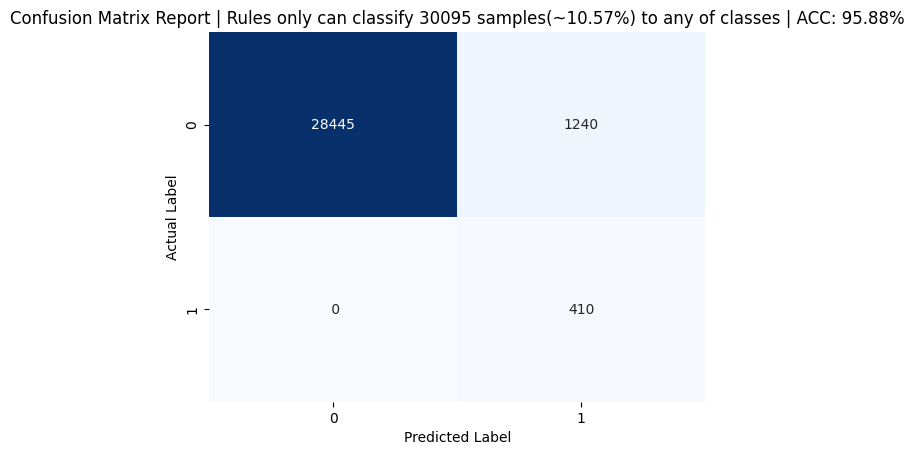

In [152]:
print(classification_report(TrueLabels,PredictedLabel))
print("#Total Samples: {0} | #Predicted Samples: {1} | #NonPredicted Samples: {2} | Rate of prediction: {3}%".format(PreCount+NonCount,PreCount,NonCount,round(PreCount/(PreCount+NonCount)*100,2)))

cm = confusion_matrix(TrueLabels, PredictedLabel)
sns.heatmap(cm,annot=True,cbar=False,cmap="Blues",fmt="2d")
tmp = sum(cm.flatten())
plt.title("Confusion Matrix Report | Rules only can classify {0} samples(~{1}%) to any of classes | ACC: {2}%".format(tmp,round(tmp/284807*100,2),round(accuracy_score(TrueLabels,PredictedLabel)*100,2)))
plt.ylabel("Actual Label")
plt.xlabel("Predicted Label")
plt.show()

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    284315
           1       0.25      0.83      0.38       492

    accuracy                           1.00    284807
   macro avg       0.62      0.91      0.69    284807
weighted avg       1.00      1.00      1.00    284807



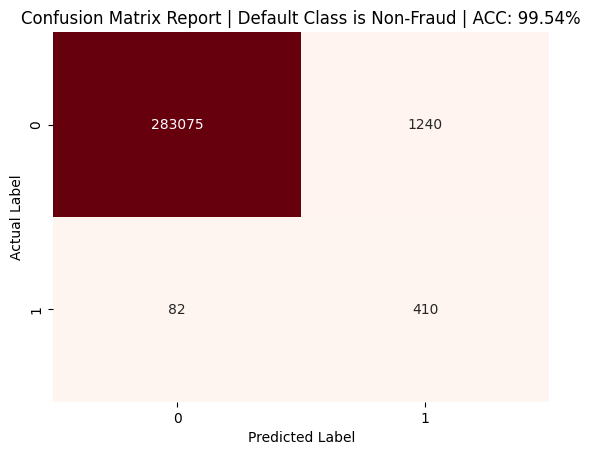

In [146]:
print(classification_report(TrueLabelsDef,PredictedLabelDef))

cm = confusion_matrix(TrueLabelsDef, PredictedLabelDef)
sns.heatmap(cm,annot=True,cbar=False,cmap="Reds",fmt="2d")
plt.title("Confusion Matrix Report | Default Class is Non-Fraud | ACC: {0}%".format(round(accuracy_score(TrueLabelsDef,PredictedLabelDef)*100,2)))
plt.ylabel("Actual Label")
plt.xlabel("Predicted Label")
plt.show()

**All used rules**

In [147]:
len(F2)

7

In [148]:
len(F3)

100

In [149]:
len(N2)

50

In [150]:
len(N3)

100

In [143]:
cm

array([[283075,   1240],
       [    82,    410]])